## Apply Linear Regression for Classification
### Applying linear regression changing the features = x1^2 , x2^2 , x3^2 , x4^2 , x1.x2 , x2.x3 .. on Diabetes and Iris dataset

## IRIS DATASET

In [75]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
iris = pd.read_csv("iris.csv")

In [76]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [77]:
#Replacing string values in species column with integers
iris['species'].replace(['setosa' , 'virginica' , 'versicolor' ] , [0 , 1 , 2] , inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [78]:
iris.columns = ['x1' , 'x2' , 'x3' , 'x4' , 'y']
iris.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
#Separating Y column
Y = iris["y"]
del iris["y"]
iris.head()

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### First apply Linear Regression directly and find score for the same.
### Add columns (x1.x1 , x1.x2 ...) and apply Linear Regression and compare the scores.


In [80]:
clf = LinearRegression()
X_Train , X_Test , Y_Train , Y_Test = cross_validation.train_test_split(iris , Y , test_size = 0.2)
clf.fit(X_Train , Y_Train)
score = clf.score(X_Test , Y_Test)
print("Score by directly applying linear regression" , score)

Score by directly applying linear regression 0.501962327713


In [81]:
#Adding new columns like x1^2 , x2^2 , x1.x2 and so on to our dataset

def addColumns(iris):
    for i in range(1 , 5):
        for j in range(i , 5):
            colName = "x" + str(i) + "x" + str(j)
            iris[colName] = iris["x" + str(i)]*iris["x" + str(j)]
    return iris

In [82]:
iris = addColumns(iris)
iris.head()

,x1,x2,x3,x4,x1x1,x1x2,x1x3,x1x4,x2x2,x2x3,x2x4,x3x3,x3x4,x4x4
0,5.1,3.5,1.4,0.2,26.01,17.85,7.14,1.02,12.25,4.90,0.70,1.96,0.28,0.04
1,4.9,3.0,1.4,0.2,24.01,14.70,6.86,0.98,9.00,4.20,0.60,1.96,0.28,0.04
2,4.7,3.2,1.3,0.2,22.09,15.04,6.11,0.94,10.24,4.16,0.64,1.69,0.26,0.04
3,4.6,3.1,1.5,0.2,21.16,14.26,6.90,0.92,9.61,4.65,0.62,2.25,0.30,0.04
4,5.0,3.6,1.4,0.2,25.00,18.00,7.00,1.00,12.96,5.04,0.72,1.96,0.28,0.04


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

In [84]:
clf = LinearRegression()
X_Train , X_Test , Y_Train , Y_Test = cross_validation.train_test_split(iris , Y , test_size = 0.2)


In [85]:
clf.fit(X_Train , Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
Y_predict = clf.predict(X_Test)
Y_predict

array([ 0.05850253,  1.79448081,  1.8901647 ,  1.68170094,  2.09155323,
        1.8614366 ,  1.8177032 ,  1.39989453,  1.1824412 ,  0.05673063,
        1.68373401,  1.77106462,  0.4564629 ,  0.20389667, -0.11333319,
       -0.0142106 ,  1.70231601,  0.24950667,  0.44847961,  0.97558138,
        1.86255269,  1.98890718,  2.02589285,  1.53273172, -0.01286243,
       -0.19867278,  1.69235037,  1.83810534,  0.32091815,  1.79045943])

In [88]:
score = clf.score(X_Test, Y_Test)
print("Score evaluated by adding columns and applying Linear Regression = " , score )

Score evaluated by adding columns and applying Linear Regression =  0.878122769628


## DIABETES DATASET

In [90]:
diabetes = pd.read_csv("pima-indians-diabetes.csv" , names = ['x1' , 'x2' , 'x3' , 'x4' , 'x5' , 'x6' , 'x7' , 'x8' , 'y'])
diabetes.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
#Separating y
Y = diabetes['y']
del diabetes['y']
diabetes.head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [92]:
clf = LinearRegression()
X_Train , X_Test , Y_Train , Y_Test = cross_validation.train_test_split(diabetes , Y , test_size = 0.2)
clf.fit(X_Train , Y_Train)
score = clf.score(X_Test , Y_Test)
print("Score by directly applying linear regression" , score)

Score by directly applying linear regression 0.266516526292


In [93]:
#Adding columns to the dataframe

def addColumns(diabetes):
    for i in range(1 , 9):
        for j in range(i , 9):
            colName = "x" + str(i) + "x" + str(j)
            diabetes[colName] = diabetes["x" + str(i)] * diabetes["x" + str(j)]
    return diabetes

In [94]:
diabetes = addColumns(diabetes)
diabetes.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x1x1,x1x2,...,x5x5,x5x6,x5x7,x5x8,x6x6,x6x7,x6x8,x7x7,x7x8,x8x8
0,6,148,72,35,0,33.6,0.627,50,36,888,...,0,0.0,0.000,0,1128.96,21.0672,1680.0,0.393129,31.350,2500
1,1,85,66,29,0,26.6,0.351,31,1,85,...,0,0.0,0.000,0,707.56,9.3366,824.6,0.123201,10.881,961
2,8,183,64,0,0,23.3,0.672,32,64,1464,...,0,0.0,0.000,0,542.89,15.6576,745.6,0.451584,21.504,1024
3,1,89,66,23,94,28.1,0.167,21,1,89,...,8836,2641.4,15.698,1974,789.61,4.6927,590.1,0.027889,3.507,441
4,0,137,40,35,168,43.1,2.288,33,0,0,...,28224,7240.8,384.384,5544,1857.61,98.6128,1422.3,5.234944,75.504,1089


In [95]:
clf = LinearRegression()

In [96]:
X_Train , X_Test , Y_Train , Y_Test = cross_validation.train_test_split(diabetes , Y , test_size = 0.2)

In [97]:
clf.fit(X_Train , Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
Y_predict = clf.predict(X_Test)
Y_predict[0:10]

array([ 0.18301411,  0.24073702,  0.09370514,  0.40377918,  0.56599859,
        0.29089719, -0.09413542,  0.41118897,  0.23754064,  0.75134645])

In [99]:
score = clf.score(X_Test , Y_Test)
print("Score = " , score)

Score =  0.294908553387


## Logistic Regression

#### Unlike the name, Logistic regression is a classification algorithm. The equation of logistic regression ia same as the equation of linear regression ( m1.x1 + m2.x2 + m3.x3 + m4.x4 + .... + b ). The only difference is that predicted values of logisic regression are either 0 or 1. This happens due to the core function working at the heart of this algorithm, called, **sigmoid function** ( also called logistic function ).
#### The **sigmoid function** can be represented as follows :

<img src = "1.png">

#### In the above figure, Z = ( m1.x1 + m2.x2 + m3.x3 + m4.x4 + .... + b )

#### It is the go-to method for binary classification problems (problems with two class values). 


In [2]:
#Coding Logistic Regression for two class classification with Diabetes Dataset

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
columnNames = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age" , "Y"]
diabetes = pd.read_csv("pima-indians-diabetes.csv" , names = columnNames) 

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info() #Gives information about the data column-wise

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Y                           768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.count() #Returns the number of Non- null values for each column

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Y                           768
dtype: int64

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Applying Feature Scaling from Sklearn as domain of different features are varying widely

In [8]:
scaler = MinMaxScaler()

In [9]:
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes[diabetes.columns] = scaler.fit_transform(diabetes[diabetes.columns])

In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [12]:
#Adding a new column for b parameter of m1.x1 + m2.x2 .. + b with all feature values to be 1
diabetes["x"] = [1 for i in range(768)]
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y,x
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0,1
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0,1
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0,1


In [13]:
#Rearranging the columns
diabetes = diabetes [["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI" , "DiabetesPedigreeFunction" , "Age" , "x" , "Y"]]
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,x,Y
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1,1.0


In [14]:
#Logistic Function
def logit(x , m):
    z = 0
    for i in range(len(x)):
        z = z + m[i] * x[i]
    a = 1 / ( 1 + math.exp(-z) )
    return a

In [15]:
#Prediction Function
def prediction (x_test , m):
    y_predict = np.array([])
    for i in range(len(x_test)):
        y_predict = np.append(y_predict , logit(x_test[i] , m))
    y_predict = (y_predict >= y_predict.mean()).astype(int)
    return y_predict


In [16]:
def score(x_test , m):
    y_test = x_test[: , 9]
    y_predict = prediction(x_test[: , 0:9] , m)
    print(y_test)
    print(y_predict)
    indicator = np.array((y_test == y_predict).astype(int))
    print((indicator).sum())
    score = ((indicator).sum())/len(x_test)
    return score

In [17]:
def step_gradient(m , points , learningRate):
    N = len(points)
    m_gradient = np.array([0.0 for i in range(9)])
    for i in range(N):
        x = points [i , 0:9]
        y = points [i , 9]
        for j in range(len(m_gradient)):
            m_gradient[j] += ((1/N)* (logit(x , m) - y) * x[j])
    m_new = m - learningRate * m_gradient
    #print(m_new)
    return m_new

In [18]:
def gradient_step_runner(starting_m , points ,learningRate , num_of_iterations ):
    m = starting_m 
    m_list = np.array([])
    cost_list = np.array([])
    for i in range(num_of_iterations):
        m = step_gradient( m , points , learningRate)
        if(i%10 == 0):
            m_list = np.append(m_list , m[0])
            cost_list = np.append(cost_list , cost_function(points , m))
    print(m_list , cost_list)
    plt.plot(m_list , cost_list)
    plt.show()
    return m

In [19]:
def cost_function (points , m):
    cost = 0
    for i in range(len(points)):
        x = points[i , 0:9]
        y = points[i , 9]
        cost += ((y * math.log(logit(x , m))) + ((1 - y) * math.log(1 - logit(x , m))))
    return (-1/len(points))*cost

In [20]:
def run (points):
    starting_m = np.array([0 for i in range(9)])
    learningRate = 0.0001
    num_of_iterations = 1000
    print("Initial Cost Function = " , cost_function(points , starting_m))
    m = gradient_step_runner(starting_m , points , learningRate , num_of_iterations)
    print("Final Cost Function = " , cost_function(points , m))
    return m
    

In [21]:
# Splitting the dataset
train , test = train_test_split(diabetes , test_size = 0.2)
points = train.as_matrix()
test = test.as_matrix()

Initial Cost Function =  0.69314718056
[ -1.76758000e-06  -1.94340159e-05  -3.70834328e-05  -5.47158396e-05
  -7.23312455e-05  -8.99296596e-05  -1.07511091e-04  -1.25075549e-04
  -1.42623042e-04  -1.60153579e-04  -1.77667170e-04  -1.95163824e-04
  -2.12643549e-04  -2.30106355e-04  -2.47552251e-04  -2.64981245e-04
  -2.82393348e-04  -2.99788567e-04  -3.17166912e-04  -3.34528392e-04
  -3.51873016e-04  -3.69200793e-04  -3.86511732e-04  -4.03805842e-04
  -4.21083132e-04  -4.38343611e-04  -4.55587289e-04  -4.72814173e-04
  -4.90024273e-04  -5.07217598e-04  -5.24394157e-04  -5.41553960e-04
  -5.58697014e-04  -5.75823329e-04  -5.92932914e-04  -6.10025778e-04
  -6.27101929e-04  -6.44161378e-04  -6.61204132e-04  -6.78230201e-04
  -6.95239593e-04  -7.12232318e-04  -7.29208385e-04  -7.46167801e-04
  -7.63110578e-04  -7.80036722e-04  -7.96946244e-04  -8.13839152e-04
  -8.30715455e-04  -8.47575162e-04  -8.64418282e-04  -8.81244823e-04
  -8.98054796e-04  -9.14848207e-04  -9.31625067e-04  -9.48385385

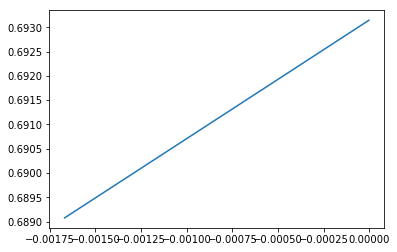

Final Cost Function =  0.689043321002


In [22]:
m = run(points)

In [23]:
s = score(test , m)
print(s)

[ 0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.
  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.
  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.
  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  1.
  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.]
[1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1
 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0
 0 0 0 1 1 0]
50
0.324675324675


In [25]:
clf = LogisticRegression()

In [27]:
clf.fit(points[: , 0:9] , points[: , 9])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred  = clf.predict(test[: , 0:9])

In [31]:
clf.score(test[: , 0:9] , y_pred)

1.0